In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_columns = 200
pd.options.display.max_rows = 20

df = pd.read_csv('M395_weekly_sales.csv')

In [86]:
df.info() # we have 302400 rows of data and 17 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302400 entries, 0 to 302399
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   REST_KEY     302400 non-null  int64  
 1   rest_label   302400 non-null  object 
 2   City         302400 non-null  object 
 3   County       302400 non-null  object 
 4   latitude     302400 non-null  float64
 5   longitude    302400 non-null  float64
 6   owner_label  302400 non-null  object 
 7   trad_label   302400 non-null  object 
 8   ItemN        302400 non-null  int64  
 9   itemdesc     302400 non-null  object 
 10  wk_ending    302400 non-null  object 
 11  urws         297638 non-null  float64
 12  wavg_price   297638 non-null  float64
 13  upt          297638 non-null  float64
 14  agc          297638 non-null  float64
 15  adus         297638 non-null  float64
 16  totunits     297638 non-null  float64
dtypes: float64(8), int64(2), object(7)
memory usage: 39.2+ MB


In [87]:
df.head(2)

,REST_KEY,rest_label,City,County,latitude,longitude,owner_label,trad_label,ItemN,itemdesc,wk_ending,urws,wavg_price,upt,agc,adus,totunits
0,117,00117-WYOM-1221 28TH,WYOMING,KENT MI,42.91389,-85.6963,MCOPCO,Y,1,Total All Day Breakfast Items,1/12/13,6195.0,1.39,550.3,1608.3,885.0,6195.0
1,117,00117-WYOM-1221 28TH,WYOMING,KENT MI,42.91389,-85.6963,MCOPCO,Y,1,Total All Day Breakfast Items,1/19/13,6434.0,1.39,584.4,1572.7,919.1,6434.0


In [88]:
df['REST_KEY'].isna().sum()

0

In [89]:
df['rest_label'].unique().size

64

In [90]:
df['City'].unique()

array(['WYOMING', 'GRAND RAPIDS', 'KALAMAZOO', 'KENTWOOD',
       'TRAVERSE CITY', 'WALKER', 'PORTAGE', 'JENISON', 'HOLLAND',
       'GRAND HAVEN', 'CEDAR SPRINGS', 'LOWELL', 'SPARTA', 'COOPERSVILLE',
       'HUDSONVILLE', 'ROCKFORD', 'SCHOOLCRAFT', 'COMSTOCK PARK',
       'WILLIAMSBURG', 'CALEDONIA', 'ZEELAND', 'GALESBURG', 'ALLENDALE',
       'ADA', 'SPRING LAKE', 'BYRON CENTER', 'RICHLAND', 'GRANDVILLE'],
      dtype=object)

In [91]:
df['County'].unique()

array(['KENT MI', 'KALAMAZOO MI', 'GRAND TRAVERSE MI', 'OTTAWA MI'],
      dtype=object)

In [92]:
df['owner_label'].unique()

array(['MCOPCO', 'LICENSEE'], dtype=object)

In [93]:
df['trad_label'].unique()

array(['Y', 'N'], dtype=object)

In [94]:
df['ItemN'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [95]:
df['itemdesc'].unique()

array(['Total All Day Breakfast Items', 'Total Breakfast Sandwich',
       'Total McMuffins', 'Egg McMuffin', 'Sausage McMuffin',
       'Sausage Egg McMuffin', 'Total Biscuits', 'Bac Egg Ch Biscuit',
       'Sausage Biscuit', 'Sausage Egg Biscuit', 'Hashbrown',
       'Total McGriddles', 'Bac Egg Ch McGriddle', 'Sau Egg Ch McGriddle',
       'Total Bagels', 'Beef Category', 'Large Burgers', 'Big Mac',
       'Core QP and QPC', 'Hamburger', 'Cheeseburger', 'Chicken Category',
       'Total Fries', 'McChicken', 'McDouble'], dtype=object)

In [96]:
df.wk_ending = pd.to_datetime(df.wk_ending, format="%m/%d/%y")

In [97]:
df.isna().any(axis='columns').value_counts(normalize=True) # proportion of missing observation

False    0.984253
True     0.015747
Name: proportion, dtype: float64

In [98]:
df.wk_ending

0        2013-01-12
1        2013-01-19
2        2013-01-26
3        2013-02-02
4        2013-02-09
            ...    
302395   2016-07-23
302396   2016-07-30
302397   2016-08-06
302398   2016-08-13
302399   2016-08-20
Name: wk_ending, Length: 302400, dtype: datetime64[ns]

In [99]:
# urws, wavg_price, upt, agc, adu, totunits are missing in the same rows
df.loc[df.totunits.isna()].shape[0] 

4762

In [100]:
df1 = df.loc[df.urws.notna()]
(df1.urws == df1.totunits).sum() == df1.shape[0]

True

In [102]:
df1.loc[((df1.urws/7).round(1) != df1.adus), ['urws', 'adus']].iloc[:5].rename(columns={'urws' : 'urws / 7'})

,urws / 7,adus
146,8452.0,1408.7
147,8432.0,1405.3
375,5654.0,942.3
381,3725.0,620.8
491,4146.0,691.0


In [16]:
df1.loc[((df1.urws/7).round(1) != df1.adus), ['urws', 'adus']].iloc[:5]

,urws,adus
146,8452.0,1408.7
147,8432.0,1405.3
375,5654.0,942.3
381,3725.0,620.8
491,4146.0,691.0


In [17]:
tb = pd.read_csv('M395_rest_facts.csv')
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REST_KEY               64 non-null     int64  
 1   rest_label             64 non-null     object 
 2   Address                64 non-null     object 
 3   City                   64 non-null     object 
 4   Zip                    64 non-null     object 
 5   State                  64 non-null     object 
 6   County                 64 non-null     object 
 7   REST_HISP_CONS_MKT     64 non-null     float64
 8   REST_AFR_AMR_CONS_MKT  64 non-null     float64
 9   REST_ASIAN_CONS_MKT    64 non-null     float64
 10  latitude               64 non-null     float64
 11  longitude              64 non-null     float64
 12  REST_PLYPL_TYP         59 non-null     object 
 13  REST_DRV_THRU_TYP      64 non-null     object 
 14  REST_TYPE              64 non-null     object 
 15  coop_lab

In [18]:
tb.columns

Index(['REST_KEY', 'rest_label', 'Address', 'City', 'Zip', 'State', 'County',
       'REST_HISP_CONS_MKT', 'REST_AFR_AMR_CONS_MKT', 'REST_ASIAN_CONS_MKT',
       'latitude', 'longitude', 'REST_PLYPL_TYP', 'REST_DRV_THRU_TYP',
       'REST_TYPE', 'coop_label', 'region_label', 'ethnic_label',
       'owner_label', 'trad_label', 'subtype_label', 'incomeq_label',
       'urban_label', 'social_label', 'lstage_label', 'ppop_09q_label',
       'pgrowthq_label'],
      dtype='object')

In [19]:
tb.coop_label.unique()

array(['GRAND RAPIDS MI'], dtype=object)

In [20]:
tb.Zip

0          49519
1          49418
2          49009
3          49316
4          49418
         ...    
59         49087
60    49509-2701
61         49525
62    49001-1752
63    49509-4416
Name: Zip, Length: 64, dtype: object

In [21]:
tb.describe()

,REST_KEY,REST_HISP_CONS_MKT,REST_AFR_AMR_CONS_MKT,REST_ASIAN_CONS_MKT,latitude,longitude
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,10886.609375,7.792344,6.356562,2.020938,42.916923,-85.689162
std,8713.592237,8.970889,8.278495,1.731623,0.613911,0.174958
min,117.000000,1.560000,0.290000,0.400000,42.122005,-86.221061
25%,4261.500000,2.530000,0.895000,0.777500,42.687996,-85.724051
50%,8877.500000,4.055000,2.720000,1.330000,42.909694,-85.659290
75%,15645.000000,7.325000,8.955000,2.680000,43.014030,-85.587813
max,36302.000000,54.150000,40.310000,8.190000,44.772187,-85.354259


In [22]:
tb.head()

,REST_KEY,rest_label,Address,City,Zip,State,County,REST_HISP_CONS_MKT,REST_AFR_AMR_CONS_MKT,REST_ASIAN_CONS_MKT,latitude,longitude,REST_PLYPL_TYP,REST_DRV_THRU_TYP,REST_TYPE,coop_label,region_label,ethnic_label,owner_label,trad_label,subtype_label,incomeq_label,urban_label,social_label,lstage_label,ppop_09q_label,pgrowthq_label
0,36277,36277-WYOMING - CHICAGO AND GODFREY,1115 CHICAGO DR SW,WYOMING,49519,MI,KENT MI,54.15,10.39,0.79,42.935777,-85.694556,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,GRAND RAPIDS MI,MICHIGAN,HCM,LICENSEE,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN
1,36302,36302-GRANDVILLE - RIVERTOWN & IVANREST,2980 44TH STREET,GRANDVILLE,49418,MI,KENT MI,7.43,3.39,2.21,42.884165,-85.738159,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,GRAND RAPIDS MI,MICHIGAN,GCM,LICENSEE,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN
2,26114,26114-OSHTEMO TOWNSHIP,6820 W MAIN (M-43),KALAMAZOO,49009,MI,KALAMAZOO MI,3.00,5.42,2.45,42.296384,-85.683582,NaN,2 BOOTH COD,FREESTANDING,GRAND RAPIDS MI,MICHIGAN,GCM,LICENSEE,Y,Traditional,1-Highest Income,4-Town and Rural,11 T1- Landed Gentry,01 Y1- Midlif Success,4-2ndLowest PPop_0_9,1-Highest Pgrowth
3,12839,12839-CALEDONIA,9383 CHERRY VALLEY,CALEDONIA,49316,MI,KENT MI,2.38,0.78,1.06,42.795304,-85.507634,NONE,FACE TO FACE TANDEM,FREESTANDING,GRAND RAPIDS MI,MICHIGAN,GCM,LICENSEE,Y,Traditional,2-2ndHighest Income,4-Town and Rural,12 T2- Country Cmfrt,02 Y2- Young Achievrs,1-Highest PPop_0_9,1-Highest Pgrowth
4,33312,33312-WYOMING - BYRON CENTER,5631 BYRON CENTER AVE,WYOMING,49418,MI,KENT MI,6.13,2.10,4.34,42.861650,-85.723800,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,GRAND RAPIDS MI,MICHIGAN,GCM,LICENSEE,Y,Traditional,1-Highest Income,2-Suburban,05 S2- Affluentials,01 Y1- Midlif Success,1-Highest PPop_0_9,1-Highest Pgrowth


In [23]:
# any missing values ?
tb.isna().sum()

REST_KEY          0
rest_label        0
Address           0
City              0
Zip               0
                 ..
urban_label       2
social_label      2
lstage_label      2
ppop_09q_label    2
pgrowthq_label    2
Length: 27, dtype: int64

In [24]:
tb.duplicated(subset=['Address', 'City', 'Zip', 'State', 'County']).sum()

0

(need to refine these question until answer them using the data)
1. How is the preformance of Franchise vs owned after the promotion ? 
2. Does location has an impact on the performace ?
3. What are some of the products which were boosted most on average and which one slumped ?
4. How many months did the promotion effect last ? Was it temporary ?
5. During the promoting, how were the sales in the beginning ?
## This is just like writing a story. We start with the a situation, and then along the way there are a lot of twists and turns, which arises because of interactions. Data shows us a part of it.

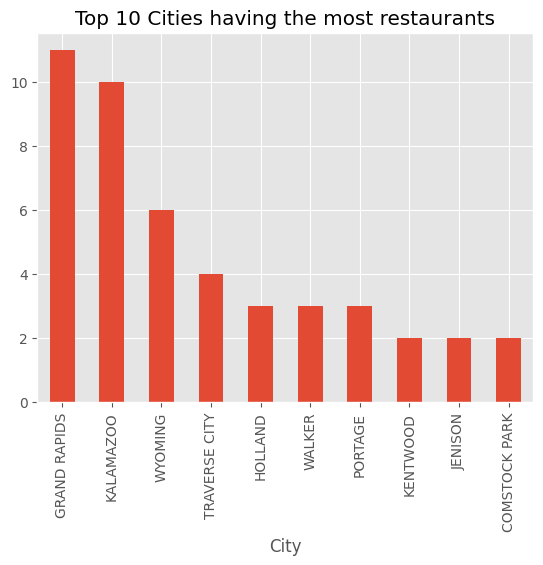

In [25]:
tb.City.value_counts().head(10).plot.bar(title = 'Top 10 Cities having the most restaurants')
plt.show()

In [26]:
tb.State.value_counts()

State
MI    64
Name: count, dtype: int64

In [27]:
tb.County.value_counts()

County
KENT MI              33
KALAMAZOO MI         16
OTTAWA MI            10
GRAND TRAVERSE MI     5
Name: count, dtype: int64

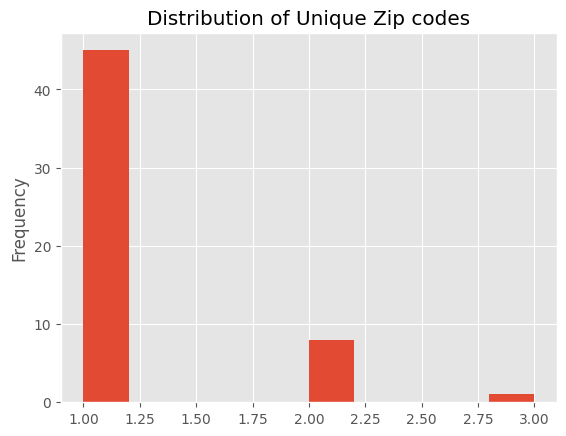

In [28]:
tb.Zip.value_counts().plot(kind='hist', title = 'Distribution of Unique Zip codes')
plt.show()

In [29]:
tb.head(2)

,REST_KEY,rest_label,Address,City,Zip,State,County,REST_HISP_CONS_MKT,REST_AFR_AMR_CONS_MKT,REST_ASIAN_CONS_MKT,latitude,longitude,REST_PLYPL_TYP,REST_DRV_THRU_TYP,REST_TYPE,coop_label,region_label,ethnic_label,owner_label,trad_label,subtype_label,incomeq_label,urban_label,social_label,lstage_label,ppop_09q_label,pgrowthq_label
0,36277,36277-WYOMING - CHICAGO AND GODFREY,1115 CHICAGO DR SW,WYOMING,49519,MI,KENT MI,54.15,10.39,0.79,42.935777,-85.694556,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,GRAND RAPIDS MI,MICHIGAN,HCM,LICENSEE,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN
1,36302,36302-GRANDVILLE - RIVERTOWN & IVANREST,2980 44TH STREET,GRANDVILLE,49418,MI,KENT MI,7.43,3.39,2.21,42.884165,-85.738159,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,GRAND RAPIDS MI,MICHIGAN,GCM,LICENSEE,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN


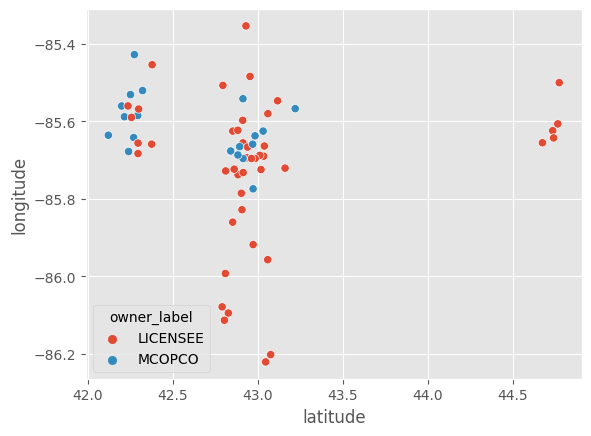

In [30]:
sns.scatterplot(x='latitude', y='longitude', hue='owner_label', data = tb)
plt.show() # check these by county as well to get the regions 

In [31]:
tb.value_counts(subset=['County', 'owner_label'])

County             owner_label
KENT MI            LICENSEE       23
                   MCOPCO         10
OTTAWA MI          LICENSEE       10
KALAMAZOO MI       MCOPCO          9
                   LICENSEE        7
GRAND TRAVERSE MI  LICENSEE        5
Name: count, dtype: int64

In [32]:
tb.columns

Index(['REST_KEY', 'rest_label', 'Address', 'City', 'Zip', 'State', 'County',
       'REST_HISP_CONS_MKT', 'REST_AFR_AMR_CONS_MKT', 'REST_ASIAN_CONS_MKT',
       'latitude', 'longitude', 'REST_PLYPL_TYP', 'REST_DRV_THRU_TYP',
       'REST_TYPE', 'coop_label', 'region_label', 'ethnic_label',
       'owner_label', 'trad_label', 'subtype_label', 'incomeq_label',
       'urban_label', 'social_label', 'lstage_label', 'ppop_09q_label',
       'pgrowthq_label'],
      dtype='object')

c:\Users\sar31\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sar31\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sar31\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


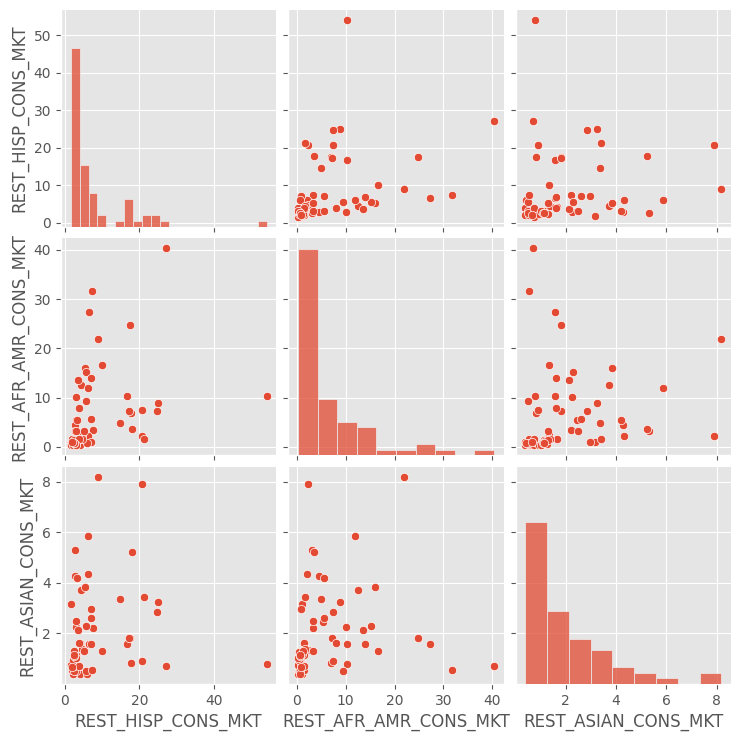

In [33]:
sns.pairplot(tb, vars=['REST_HISP_CONS_MKT', 'REST_AFR_AMR_CONS_MKT', 'REST_ASIAN_CONS_MKT'])

In [34]:
df = pd.read_csv('M395_weekly_sales.csv')

In [35]:
df.columns

Index(['REST_KEY', 'rest_label', 'City', 'County', 'latitude', 'longitude',
       'owner_label', 'trad_label', 'ItemN', 'itemdesc', 'wk_ending', 'urws',
       'wavg_price', 'upt', 'agc', 'adus', 'totunits'],
      dtype='object')

In [36]:
df.describe()

,REST_KEY,latitude,longitude,ItemN,urws,wavg_price,upt,agc,adus,totunits
count,302400.000000,302400.000000,302400.000000,302400.000000,297638.000000,297638.000000,297638.000000,297638.000000,297638.000000,297638.000000
mean,10886.609375,42.916923,-85.689162,13.000000,1385.219404,2.253532,150.597909,1327.021223,198.697110,1385.219404
std,8645.263576,0.609097,0.173586,7.211114,1687.315560,0.989593,174.004937,335.068459,241.734984,1687.315560
min,117.000000,42.122005,-86.221061,1.000000,3.000000,0.510000,1.300000,293.700000,1.000000,3.000000
25%,4261.500000,42.687996,-85.724051,7.000000,265.000000,1.250000,29.600000,1081.300000,38.000000,265.000000
50%,8877.500000,42.909694,-85.659290,13.000000,646.000000,2.230000,70.300000,1314.900000,92.700000,646.000000
75%,15645.000000,43.014030,-85.587813,19.000000,1789.000000,2.990000,194.600000,1561.300000,257.000000,1789.000000
max,36302.000000,44.772187,-85.354259,25.000000,13217.000000,5.530000,1268.000000,2670.000000,1888.100000,13217.000000


In [37]:
df.isna().sum() # may be the restaurants were not functioning when reading were taken, therefore we have missing values

REST_KEY          0
rest_label        0
City              0
County            0
latitude          0
longitude         0
owner_label       0
trad_label        0
ItemN             0
itemdesc          0
wk_ending         0
urws           4762
wavg_price     4762
upt            4762
agc            4762
adus           4762
totunits       4762
dtype: int64

In [38]:
df.City.value_counts() # does not give much information

City
GRAND RAPIDS     51975
KALAMAZOO        47250
WYOMING          28350
TRAVERSE CITY    18900
HOLLAND          14175
                 ...  
SPARTA            4725
LOWELL            4725
CEDAR SPRINGS     4725
GRAND HAVEN       4725
GRANDVILLE        4725
Name: count, Length: 28, dtype: int64

look into profits, and customer count at county level, then city level, and then at individual restaurant level
Also look into which retaurants have  missing data, find their id, and locations, and at what point in time do they have
missing data, and how many of them have this problem.

In [39]:
df.City.unique()

array(['WYOMING', 'GRAND RAPIDS', 'KALAMAZOO', 'KENTWOOD',
       'TRAVERSE CITY', 'WALKER', 'PORTAGE', 'JENISON', 'HOLLAND',
       'GRAND HAVEN', 'CEDAR SPRINGS', 'LOWELL', 'SPARTA', 'COOPERSVILLE',
       'HUDSONVILLE', 'ROCKFORD', 'SCHOOLCRAFT', 'COMSTOCK PARK',
       'WILLIAMSBURG', 'CALEDONIA', 'ZEELAND', 'GALESBURG', 'ALLENDALE',
       'ADA', 'SPRING LAKE', 'BYRON CENTER', 'RICHLAND', 'GRANDVILLE'],
      dtype=object)

In [40]:
'owner_label', 'trad_label', 'ItemN', 'itemdesc'
df.owner_label.unique() # value count does not help here because the values across the timescale are aggregated

array(['MCOPCO', 'LICENSEE'], dtype=object)

In [41]:
df.trad_label.unique()

array(['Y', 'N'], dtype=object)

In [42]:
df.ItemN.unique() # what is this ?

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [43]:
df.itemdesc.value_counts() # these categories are constant for each restaurant, hence they appear across each observation

itemdesc
Total All Day Breakfast Items    12096
Sau Egg Ch McGriddle             12096
McChicken                        12096
Total Fries                      12096
Chicken Category                 12096
                                 ...  
Sausage Egg McMuffin             12096
Sausage McMuffin                 12096
Egg McMuffin                     12096
Total McMuffins                  12096
McDouble                         12096
Name: count, Length: 25, dtype: int64

In [44]:
df.itemdesc.unique()

array(['Total All Day Breakfast Items', 'Total Breakfast Sandwich',
       'Total McMuffins', 'Egg McMuffin', 'Sausage McMuffin',
       'Sausage Egg McMuffin', 'Total Biscuits', 'Bac Egg Ch Biscuit',
       'Sausage Biscuit', 'Sausage Egg Biscuit', 'Hashbrown',
       'Total McGriddles', 'Bac Egg Ch McGriddle', 'Sau Egg Ch McGriddle',
       'Total Bagels', 'Beef Category', 'Large Burgers', 'Big Mac',
       'Core QP and QPC', 'Hamburger', 'Cheeseburger', 'Chicken Category',
       'Total Fries', 'McChicken', 'McDouble'], dtype=object)

In [45]:
df.itemdesc.unique().size

25

In [46]:
'wk_ending', 'urws', 'wavg_price', 'upt', 'agc', 'adus', 'City', 'County', 'latitude', 'longitude', 'owner_label', 'trad_label'

('wk_ending',
 'urws',
 'wavg_price',
 'upt',
 'agc',
 'adus',
 'City',
 'County',
 'latitude',
 'longitude',
 'owner_label',
 'trad_label')

In [47]:
df.wk_ending = pd.to_datetime(df.wk_ending, format='%m/%d/%y')
df.wk_ending.head()

0   2013-01-12
1   2013-01-19
2   2013-01-26
3   2013-02-02
4   2013-02-09
Name: wk_ending, dtype: datetime64[ns]

In [53]:
df.loc[df.urws.isna(), ['wk_ending', 'rest_label', 'trad_label']].groupby(['rest_label', 'trad_label']).wk_ending.apply(lambda x: x.min())

rest_label                      trad_label
02308-WALKER-ALPINE             Y            2015-05-09
04635-TRAVRS-US 31-SOUTH        Y            2013-05-04
05238-HOLLAND-RIVER             Y            2013-04-13
16773-THRNAPLE VILLAGE          N            2013-01-12
36277-WYOMING - CHICAGO AND GO  Y            2013-01-12
36302-GRANDVILLE - RIVERTOWN &  Y            2013-01-12
Name: wk_ending, dtype: datetime64[ns]

In [130]:
# subtracting dates is not correct because it is not a contiguous period
df.loc[df.urws.isna(), ['wk_ending', 'rest_label']].groupby('rest_label').wk_ending.apply(lambda x: x.max() - x.min())

rest_label
02308-WALKER-ALPINE                63 days
04635-TRAVRS-US 31-SOUTH            0 days
05238-HOLLAND-RIVER                63 days
16773-THRNAPLE VILLAGE           1316 days
36277-WYOMING - CHICAGO AND GO    539 days
36302-GRANDVILLE - RIVERTOWN &    210 days
Name: wk_ending, dtype: timedelta64[ns]

In [131]:
df.loc[(df.rest_label == "04635-TRAVRS-US 31-SOUTH") & (df.urws.isna())].shape # only one week of data 2013/5/4 missing 
# we have 25 unique items in total

(25, 17)

In [73]:
a = (
    df.loc[df.urws.isna(), ['wk_ending', 'rest_label', 'County','owner_label', 'trad_label']].
    groupby(['County', 'rest_label', 'owner_label', 'trad_label']).
    wk_ending.
    apply(lambda x:x.min())
)
a
# look all of them were Licensee, and Thrnaple Village was a non-traditional restaurant. This begs the question why the Mcdonalds owned do not have any missing data ? Is the data missing because it was management oversight on part of Licensee and it increases in a non-traditional restaurant. 

County             rest_label                      owner_label  trad_label
GRAND TRAVERSE MI  04635-TRAVRS-US 31-SOUTH        LICENSEE     Y            2013-05-04
KENT MI            02308-WALKER-ALPINE             LICENSEE     Y            2015-05-09
                   16773-THRNAPLE VILLAGE          LICENSEE     N            2013-01-12
                   36277-WYOMING - CHICAGO AND GO  LICENSEE     Y            2013-01-12
                   36302-GRANDVILLE - RIVERTOWN &  LICENSEE     Y            2013-01-12
OTTAWA MI          05238-HOLLAND-RIVER             LICENSEE     Y            2013-04-13
Name: wk_ending, dtype: datetime64[ns]

In [74]:
df['missing_count'] = df.urws.isna()

b = (
    df.loc[df.urws.isna(), ['missing_count', 'rest_label', 'County','owner_label', 'trad_label']].
    groupby(['County', 'rest_label', 'owner_label', 'trad_label']).
    count()
)
b

missing_count
County            rest_label                     owner_label trad_label               
GRAND TRAVERSE MI 04635-TRAVRS-US 31-SOUTH       LICENSEE    Y                      25
KENT MI           02308-WALKER-ALPINE            LICENSEE    Y                     250
                  16773-THRNAPLE VILLAGE         LICENSEE    N                    1512
                  36277-WYOMING - CHICAGO AND GO LICENSEE    Y                    1950
                  36302-GRANDVILLE - RIVERTOWN & LICENSEE    Y                     775
OTTAWA MI         05238-HOLLAND-RIVER            LICENSEE    Y                     250

In [84]:
b.join(a).rename(columns={'wk_ending':'start_date'})

missing_count  \
County            rest_label                     owner_label trad_label                  
GRAND TRAVERSE MI 04635-TRAVRS-US 31-SOUTH       LICENSEE    Y                      25   
KENT MI           02308-WALKER-ALPINE            LICENSEE    Y                     250   
                  16773-THRNAPLE VILLAGE         LICENSEE    N                    1512   
                  36277-WYOMING - CHICAGO AND GO LICENSEE    Y                    1950   
                  36302-GRANDVILLE - RIVERTOWN & LICENSEE    Y                     775   
OTTAWA MI         05238-HOLLAND-RIVER            LICENSEE    Y                     250   

                                                                        start_date  
County            rest_label                     owner_label trad_label             
GRAND TRAVERSE MI 04635-TRAVRS-US 31-SOUTH       LICENSEE    Y          2013-05-04  
KENT MI           02308-WALKER-ALPINE            LICENSEE    Y          2015-05-09  
                  16773-THRNAPLE VILLAGE         LICENSEE    N          2013-01-12  
                  36277-WYOMING - CHICAGO AND GO LICENSEE    Y          2013-01-12  
                  36302-GRANDVILLE - RIVERTOWN & LICENSEE    Y          2013-01-12  
OTTAWA MI         05238-HOLLAND-RIVER            LICENSEE    Y          2013-04-13

In [133]:
# Let us look at why thrnaple village(store-front non-traditional restaurant) has this much data missing
# how to check if this is a contiguous period or not ?
temp_df = df.loc[(df.rest_label == "16773-THRNAPLE VILLAGE") & (df.urws.isna())].copy()

In [134]:
temp_df

,REST_KEY,rest_label,City,County,latitude,longitude,owner_label,trad_label,ItemN,itemdesc,wk_ending,urws,wavg_price,upt,agc,adus,totunits
82026,16773,16773-THRNAPLE VILLAGE,ADA,KENT MI,42.954684,-85.484517,LICENSEE,N,7,Total Biscuits,2013-01-12,NaN,NaN,NaN,NaN,NaN,NaN
82027,16773,16773-THRNAPLE VILLAGE,ADA,KENT MI,42.954684,-85.484517,LICENSEE,N,7,Total Biscuits,2013-01-19,NaN,NaN,NaN,NaN,NaN,NaN
82028,16773,16773-THRNAPLE VILLAGE,ADA,KENT MI,42.954684,-85.484517,LICENSEE,N,7,Total Biscuits,2013-01-26,NaN,NaN,NaN,NaN,NaN,NaN
82029,16773,16773-THRNAPLE VILLAGE,ADA,KENT MI,42.954684,-85.484517,LICENSEE,N,7,Total Biscuits,2013-02-02,NaN,NaN,NaN,NaN,NaN,NaN
82030,16773,16773-THRNAPLE VILLAGE,ADA,KENT MI,42.954684,-85.484517,LICENSEE,N,7,Total Biscuits,2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178978,16773,16773-THRNAPLE VILLAGE,ADA,KENT MI,42.954684,-85.484517,LICENSEE,N,15,Total Bagels,2016-07-23,NaN,NaN,NaN,NaN,NaN,NaN
178979,16773,16773-THRNAPLE VILLAGE,ADA,KENT MI,42.954684,-85.484517,LICENSEE,N,15,Total Bagels,2016-07-30,NaN,NaN,NaN,NaN,NaN,NaN
178980,16773,16773-THRNAPLE VILLAGE,ADA,KENT MI,42.954684,-85.484517,LICENSEE,N,15,Total Bagels,2016-08-06,NaN,NaN,NaN,NaN,NaN,NaN
178981,16773,16773-THRNAPLE VILLAGE,ADA,KENT MI,42.954684,-85.484517,LICENSEE,N,15,Total Bagels,2016-08-13,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
from pandas.tseries.offsets import Day
(pd.Series(temp_df.wk_ending.unique()).diff(1) != Day(7)).sum() # the period is contiguous

1

In [136]:
# search for missing data by the item type for which it is missing.
df.loc[df.urws.isna()].itemdesc.unique().size # seems like all are missing somewhere

25

In [137]:
# look at missing items store wise
# doesn't seem to be any pattern to missingness, either all the data is missing or some of it in case of Thrnaple village
df[df.urws.isna()].groupby('rest_label').apply(lambda x : x.itemdesc.unique().size)

rest_label
02308-WALKER-ALPINE               25
04635-TRAVRS-US 31-SOUTH          25
05238-HOLLAND-RIVER               25
16773-THRNAPLE VILLAGE             8
36277-WYOMING - CHICAGO AND GO    25
36302-GRANDVILLE - RIVERTOWN &    25
dtype: int64

In [138]:
df.loc[(df.rest_label == "16773-THRNAPLE VILLAGE") & (df.urws.isna())].itemdesc.unique()

array(['Total Biscuits', 'Bac Egg Ch Biscuit', 'Sausage Biscuit',
       'Sausage Egg Biscuit', 'Total McGriddles', 'Bac Egg Ch McGriddle',
       'Sau Egg Ch McGriddle', 'Total Bagels'], dtype=object)

In [139]:
# are the restaurants missing data in similar periods ?
# this is intresting, accept the first, they are missing data starting from the same period. What happened in 2013 winter ?
df[df.urws.isna()].groupby('rest_label').apply(lambda x : x.wk_ending.min())

rest_label
02308-WALKER-ALPINE              2015-05-09
04635-TRAVRS-US 31-SOUTH         2013-05-04
05238-HOLLAND-RIVER              2013-04-13
16773-THRNAPLE VILLAGE           2013-01-12
36277-WYOMING - CHICAGO AND GO   2013-01-12
36302-GRANDVILLE - RIVERTOWN &   2013-01-12
dtype: datetime64[ns]

In [140]:
# discuss the customer count across the timescale among license and mcdonald owned restaurants, how to do this in tableau
# how to understand the negative impact of promotion on other products.
# is avg better or sum when plotting on time series.

<Axes: xlabel='itemdesc,missing'>

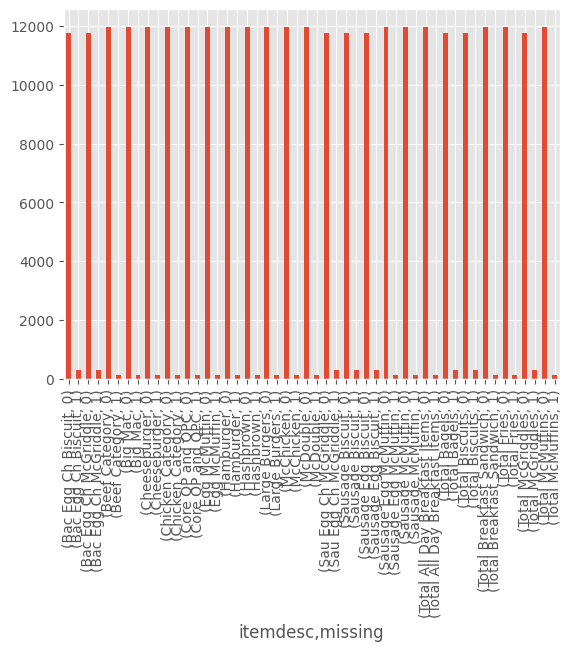

In [141]:
x = df[['urws', 'itemdesc']].copy()
x['missing'] = x.urws.isna().map({True: 1, False: 0})
x.groupby(['itemdesc', 'missing'])[['itemdesc', 'missing']].value_counts().plot(kind='bar')